# Le Support Vector Machine avec sklearn pour la régression

## Importation des packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

## Génération des données

In [5]:
m = 100
x = 6 * np.random.rand(m, 1) - 8
y = 0.5 * x[:, 0]**2 + x[:, 0] + 2 + np.random.randn(m)

## Visualisation des données

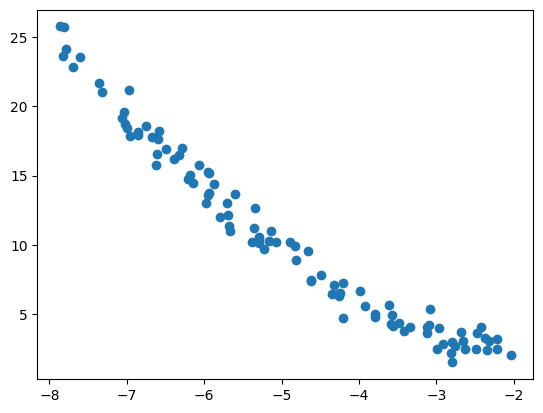

In [7]:
plt.scatter(x,y)
plt.show()

## Normalisation des données

In [10]:
std = StandardScaler()

x_std = std.fit_transform(x)

## Initialisation du modèle

In [8]:
svm = SVR()

## Entraînement du modèle

In [12]:
svm.fit(x_std, y)

,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm.If none is given, 'rbf' will be used. If a callable is given it isused to precompute the kernel matrix.For an intuitive visualization of different kernel typessee :ref:`sphx_glr_auto_examples_svm_plot_svm_regression.py`",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.The penalty is a squared l2. For an intuitive visualization of theeffects of scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-SVR model. It specifies the epsilon-tubewithin which no penalty is associated in the training loss functionwith points predicted within a distance epsilon from the actualvalue. Must be non-negative.",0.1
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False
,"max_iter max_iter: int, default=-1Hard limit on iterations within solver, or -1 for no limit.",-1


## Visualisation des résultats

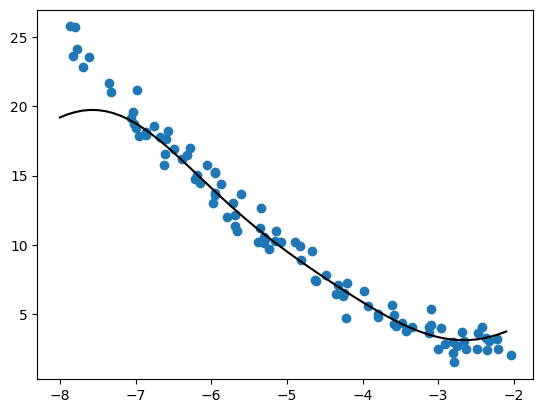

In [14]:
# données de test
x_lr = np.array(np.arange(-8, -2, 0.1)).reshape(60, 1)
x_lr_std = std.transform(x_lr)

# prediction
y_lr = svm.predict(x_lr_std)

# affichage des resultats
plt.plot(x_lr, y_lr, color='black')
plt.scatter(x,y)
plt.show()

# Les hyperparamètres

### kernel

L'hyperparamètre kernel vous permet d'utiliser des noyaux pour résoudre des problèmes non linéaires.

**Conseil :** On ne sait pas quel noyau performe le mieux à l'avance, je vous conseille de tous les tester.

Pas de noyau

In [ ]:
svm = SVR(kernel='linear')

Noyau gaussien ou RBF

In [ ]:
svm = SVR(kernel='rbf')

Noyau polynomial

In [ ]:
svm = SVR(kernel='poly')

Noyau sigmoïd

In [ ]:
svm = SVR(kernel='sigmoid')

### degree

*Degree* initialise le degré du kernel polynomial.

Cet hyperparamètre n'a pas d'incidence sur les autres noyaux.

**Conseil :** Challengez le paramètre seulement si vous utilisez le noyau polynomial.

### gamma

*Gamma* définit la portée de l'influence des exemples sur le modèle.

Plus la valeur de *gamma* sera faible plus les exemples éloignés seront pris en compte.

Plus la valeur de *gamma* est élevée plus ce seront les exemples proches qui seront pris en compte.



**Conseil :** Si la valeur de *gamma* est trop élevée vous risquez le sur-apprentissage.

### coef0

*Coef0* initialise les constantes des noyaux polynomial et sigmoid.

**Conseil :** Challengez seulement si vous utilisez le noyau polynomial ou sigmoid.

### tol

*tol* est la valeur à partir de laquelle une augmentation de performance n'est plus suffisante pour continuer l'entraînement.

**Conseil :** Laissez le paramètre par défaut.

### c

*C* est une valeur positive qui permet de régulariser le modèle.

Plus la valeur de *c* est grande, plus le modèle privilégiera la baisse de l'erreur.

Plus la valeur de *c* est petite, plus le modèle privilégiera la baisse des paramètres.

**Conseil :** Challengez la valeur de cet hyperparamètre pour rendre votre modèle plus généralisable.

### epsilon

*Epsilon* définit le tube à l'intérieur duquel aucune pénalité n'est associée dans la fonction de coût.

**Conseil :** Laissez la valeur par défaut.

### shrinking

Pour réduire le temps d'entraînement, la technique shrinking tente d'identifier et de supprimer certains éléments, de sorte que le problème d'optimisation devient plus petit.

**Conseil :** Laissez à True.

### cache_size

*Cache_size* spécifie la taille de la mémoire allouée au kernel.

**Conseil :** Si vous n'avez pas de problème de mémoire, laissez la valeur par défaut.

### verbose

La verbose permet d'avoir plus d'informations lors de l'entraînement du modèle.

**Conseil :** Ne pas utiliser et laisser la valeur par défaut.

Vebose = 0

In [ ]:
svm = SVR(verbose=0)
svm.fit(x_std, y)

verbose = 1

In [ ]:
svm = SVR(verbose=1)
svm.fit(x_std, y)

### max_iter

*Max_iter* définit le nombre d'itération après lequel le modèle stoppe l'entraînement s'il n'a pas convergé avant.

Si la valeur de *max_iter* est -1, le nombre d'itération est infini.

**Conseil :** A n'augmenter que lorsque vous avez des problèmes de convergence.

# Les attributs

## class_weight_

A ne pas utiliser

In [ ]:
svm.class_weight_

array([], dtype=float64)

## coef_

Retourne les paramètres du modèle, seulement pour le kernel linéaire.

In [ ]:
svm = SVR(kernel='linear')
svm.fit(x_std, y)
svm.coef_

array([[1.57252031]])

## dual_coef_

Retourne les coefficients du vecteur de support dans la fonction de décision.

In [ ]:
svm = SVR(kernel='rbf')
svm.fit(x_std, y)
svm.dual_coef_

array([[-1.        ,  1.        , -1.        ,  1.        , -1.        ,
         1.        ,  1.        , -1.        , -1.        , -1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  0.17924468, -1.        , -1.        , -1.        ,
        -1.        , -1.        ,  1.        ,  1.        , -1.        ,
         1.        ,  1.        , -1.        ,  1.        ,  1.        ,
         1.        , -1.        ,  1.        , -1.        ,  1.        ,
         1.        ,  0.579065  , -1.        , -1.        , -1.        ,
        -1.        , -1.        ,  1.        , -1.        , -1.        ,
         1.        , -1.        ,  1.        ,  1.        , -1.        ,
        -0.68273598, -1.        , -1.        ,  1.        , -1.        ,
        -1.        , -1.        ,  1.        , -0.07557371, -1.        ,
        -1.        ,  1.        ,  1.        ,  1.        , -1.        ,
         1.        , -1.        , -1.        ,  1. 

## fit_status_

Vous retourne si le modèle a convergé.

0 s'il n'y a pas de problème.

1 s'il y a un problème.

In [ ]:
svm.fit_status_

0

## intercept_

Retourne l'ordonnée à l'origine du modèle.

In [ ]:
svm.intercept_

array([4.33328069])

## n_features_in_

Retourne le nombre de variables dans le jeu d'entraînement.

In [ ]:
svm.n_features_in_

1

## feature_names_in_

Retourne le nom des variables dans le jeu d'entraînement.

In [ ]:
svm.feature_names_in_

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


## n_support_

Retourne le nombre de support.

In [ ]:
svm.n_support_

array([92], dtype=int32)

## shape_fit_

Retourne les dimensions du jeu d'entraînement.

In [ ]:
svm.shape_fit_

(100, 1)

## support_

Retourne les indices des vecteurs de support.

In [ ]:
svm.support_

array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 43, 44, 45, 47, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73,
       74, 75, 76, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92,
       93, 94, 95, 96, 97, 98, 99], dtype=int32)

## support_vectors_

Retourne les vecteurs de support.

In [ ]:
svm.support_vectors_

array([[-1.67015253],
       [-0.0630307 ],
       [-0.31817428],
       [ 0.67267291],
       [-1.0476086 ],
       [-0.87879117],
       [-0.03180641],
       [-0.62144348],
       [ 1.59558092],
       [-0.6699862 ],
       [-1.27914025],
       [ 1.10453525],
       [ 0.5110406 ],
       [-0.05923511],
       [-0.40376673],
       [-1.14360496],
       [ 1.02059534],
       [-0.70561454],
       [-0.19207355],
       [ 0.71457896],
       [-1.66100807],
       [ 0.27263073],
       [ 0.01658425],
       [ 0.94129219],
       [-1.23624484],
       [ 0.37489508],
       [-1.0184912 ],
       [-0.71347989],
       [-1.4244697 ],
       [-0.19919829],
       [-0.81463918],
       [-0.74741189],
       [-0.04655162],
       [-1.00251931],
       [ 1.52463347],
       [-1.43162162],
       [-1.13659956],
       [ 0.00845394],
       [ 1.35179203],
       [ 0.17010338],
       [ 1.31644021],
       [ 0.47568856],
       [ 1.47121933],
       [-0.72069878],
       [ 0.36859313],
       [-0